<a href="https://colab.research.google.com/github/martabarbosa1/Hackathon--aws/blob/main/EDA/M_Hackaton_RealEstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#data dowloaded from https://files.data.gouv.fr/geo-dvf/latest/csv/2020/full.csv.gz

In [2]:
# df_16_17 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_16_17.csv')
# df_18_19 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_18_19.csv')
# df_2017 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_2017.csv')
# df_pop_dem = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/info_pop_dem_communes_idf.csv', sep=';')
# df_log = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/logements_info_75.csv')
# df_14_15 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/transactions_idf_14_15.csv')

In [13]:
t =  pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2022/full.csv.gz')
df2022 = t[['id_mutation','valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','type_local','nature_mutation','nom_commune','code_commune','code_departement','id_parcelle','longitude','latitude','date_mutation']] 
df2022

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
0,2022-1,55000.0,24.0,1.0,Appartement,Vente,Bourg-en-Bresse,1053,1,01053000AM0102,5.218706,46.198054,2022-01-03
1,2022-2,143000.0,NaN,NaN,NaN,Vente,Savigneux,1398,1,01398000ZE0184,4.847867,46.000617,2022-01-03
2,2022-2,143000.0,NaN,NaN,NaN,Vente,Savigneux,1398,1,01398000ZE0185,4.847920,46.000576,2022-01-03
3,2022-2,143000.0,140.0,3.0,Appartement,Vente,Savigneux,1398,1,01398000ZE0187,4.848345,46.000585,2022-01-03
4,2022-3,300.0,NaN,NaN,NaN,Vente,Messimy-sur-Saône,1243,1,012430000A0643,4.747627,46.045434,2022-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429088,2022-537271,423000.0,NaN,0.0,Dépendance,Vente,Paris 15e Arrondissement,75115,75,75115000AC0055,2.305379,48.837454,2022-06-21
1429089,2022-537271,423000.0,NaN,0.0,Dépendance,Vente,Paris 15e Arrondissement,75115,75,75115000AC0055,2.305379,48.837454,2022-06-21
1429090,2022-537272,104650.0,15.0,1.0,Appartement,Vente,Paris 11e Arrondissement,75111,75,75111000BS0234,2.386354,48.856079,2022-06-30
1429091,2022-537273,51000.0,NaN,0.0,Dépendance,Adjudication,Paris 16e Arrondissement,75116,75,75116000BY0016,2.271505,48.849026,2022-02-10


In [11]:
type(df2022['code_departement'][0])

int

In [14]:
#filter only the departments in ile de france
list_departments = [75, 77, 78, 91, 93, 93, 94, 95]
df2022 = df2022[df2022['code_departement'].isin(list_departments)]

In [4]:
df2022.columns

Index(['id_mutation', 'valeur_fonciere', 'surface_reelle_bati',
       'nombre_pieces_principales', 'type_local', 'nature_mutation',
       'nom_commune', 'code_commune', 'code_departement', 'id_parcelle',
       'longitude', 'latitude', 'date_mutation'],
      dtype='object')

In [5]:
#check if we keep the column nature_mutation
df2022['nature_mutation'].value_counts()

Vente                                 1330998
Vente en l'état futur d'achèvement      80011
Echange                                 11862
Vente terrain à bâtir                    4373
Adjudication                             1338
Expropriation                             511
Name: nature_mutation, dtype: int64

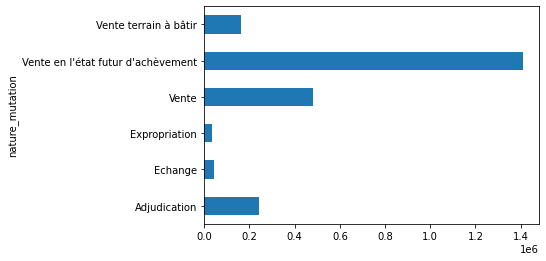

In [6]:
#do the price variie according with nature_mutation?
df2022.groupby(df2022['nature_mutation'])['valeur_fonciere'].mean().plot(kind='barh')
#yes, there is a clear difference

In [10]:
x = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2020/full.csv.gz')
df2020 = x[['id_mutation','valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','type_local','nature_mutation','nom_commune','code_commune','code_departement','id_parcelle','longitude','latitude','date_mutation']] 
df2020

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
0,2020-1,8000.0,NaN,NaN,NaN,Vente,Ceyzériat,1072,1,01072000AK0216,5.323522,46.171899,2020-01-07
1,2020-2,2175.0,NaN,NaN,NaN,Vente,Laiz,1203,1,012030000B0004,4.893447,46.251861,2020-01-02
2,2020-2,2175.0,NaN,NaN,NaN,Vente,Laiz,1203,1,012030000B0173,4.900028,46.235305,2020-01-02
3,2020-2,2175.0,NaN,NaN,NaN,Vente,Laiz,1203,1,012030000B0477,4.882230,46.246538,2020-01-02
4,2020-2,2175.0,NaN,NaN,NaN,Vente,Laiz,1203,1,012030000C0068,4.894481,46.251841,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509080,2020-1462189,1937500.0,29.0,2.0,Appartement,Vente,Paris 4e Arrondissement,75104,75,75104000AW0019,2.350486,48.854301,2020-12-16
3509081,2020-1462189,1937500.0,40.0,2.0,Appartement,Vente,Paris 4e Arrondissement,75104,75,75104000AW0019,2.350486,48.854301,2020-12-16
3509082,2020-1462189,1937500.0,24.0,1.0,Appartement,Vente,Paris 4e Arrondissement,75104,75,75104000AW0019,2.350486,48.854301,2020-12-16
3509083,2020-1462189,1937500.0,40.0,2.0,Appartement,Vente,Paris 4e Arrondissement,75104,75,75104000AW0019,2.350486,48.854301,2020-12-16


In [11]:
#filter only the departments in ile de france
list_departments = [75, 77, 78, 91, 93, 93, 94, 95]
df2020 = df2020[df2020['code_departement'].isin(list_departments)]

In [7]:
z = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2019/full.csv.gz')
df2019 = z[['id_mutation','valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','type_local','nature_mutation','nom_commune','code_commune','code_departement','id_parcelle','longitude','latitude','date_mutation']] 
df2019

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
0,2019-1,37220.0,20.0,1.0,Appartement,Vente,Bourg-en-Bresse,1053,1,01053000AI0298,5.209562,46.198840,2019-01-04
1,2019-2,185100.0,NaN,0.0,Dépendance,Vente,Bourg-en-Bresse,1053,1,01053000AM0095,5.219396,46.198766,2019-01-04
2,2019-2,185100.0,62.0,3.0,Appartement,Vente,Bourg-en-Bresse,1053,1,01053000AM0095,5.219396,46.198766,2019-01-04
3,2019-3,209000.0,90.0,4.0,Maison,Vente,Priay,1314,1,013140000E1676,5.282104,45.999566,2019-01-08
4,2019-4,134900.0,101.0,5.0,Maison,Vente,Saint-Étienne-du-Bois,1350,1,01350000AA0011,5.299929,46.293278,2019-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623952,2019-1548066,1400000.0,97.0,3.0,Appartement,Vente,Paris 2e Arrondissement,75102,75,75102000AM0018,2.348095,48.866431,2019-12-30
3623953,2019-1548067,620000.0,45.0,2.0,Appartement,Adjudication,Paris 4e Arrondissement,75104,75,75104000AM0014,2.360708,48.856187,2019-12-17
3623954,2019-1548068,370000.0,47.0,0.0,Local industriel. commercial ou assimilé,Vente,Paris 2e Arrondissement,75102,75,75102000AH0067,2.347484,48.869730,2019-12-05
3623955,2019-1548069,44000.0,NaN,0.0,Dépendance,Adjudication,Paris 2e Arrondissement,75102,75,75102000AJ0127,2.341263,48.866494,2019-12-12


In [8]:
list_departments = [75, 77, 78, 91, 93, 93, 94, 95]
df2019 = df2019[df2019['code_departement'].isin(list_departments)]

In [3]:
a = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2021/full.csv.gz')
df2021 = a[['id_mutation','valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','type_local','nature_mutation','nom_commune','code_commune','code_departement','id_parcelle','longitude','latitude','date_mutation']] 
df2021

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,12,14,17,18,20,22,24,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
0,2021-1,185000.0,97.0,5.0,Maison,Vente,Val-Revermont,1426,1,01426312ZC0122,5.386094,46.327140,2021-01-05
1,2021-1,185000.0,NaN,0.0,Dépendance,Vente,Val-Revermont,1426,1,01426312ZC0122,5.386094,46.327140,2021-01-05
2,2021-2,10.0,NaN,NaN,NaN,Vente,Bey,1042,1,010420000A0204,4.844368,46.224233,2021-01-06
3,2021-3,204332.0,88.0,4.0,Maison,Vente,Buellas,1065,1,010650000B1325,5.157688,46.200988,2021-01-04
4,2021-4,320000.0,NaN,0.0,Dépendance,Vente,Montagnat,1254,1,01254000AZ0011,5.273260,46.156334,2021-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375218,2021-1624386,383000.0,30.0,2.0,Appartement,Vente,Paris 4e Arrondissement,75104,75,75104000AO0117,2.367712,48.854200,2021-03-12
4375219,2021-1624387,260000.0,37.0,2.0,Appartement,Vente,Paris 2e Arrondissement,75102,75,75102000AP0128,2.350774,48.868450,2021-03-17
4375220,2021-1624388,38000.0,NaN,0.0,Dépendance,Vente,Paris 4e Arrondissement,75104,75,75104000AH0068,2.357623,48.858041,2021-03-19
4375221,2021-1624389,38000.0,NaN,0.0,Dépendance,Vente,Paris 4e Arrondissement,75104,75,75104000AP0005,2.365430,48.852861,2021-03-30


In [5]:
list_departments = [75, 77, 78, 91, 93, 93, 94, 95]
df2021 = df2021[df2021['code_departement'].isin(list_departments)]

In [15]:
df_all = pd.concat([df2019, df2020, df2021, df2022])

In [16]:
df_all

,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
2728836,2019-1137255,310000.0,101.0,4.0,Maison,Vente,Gretz-Armainvilliers,77215,77,772150000B0473,2.740574,48.739669,2019-01-03
2728837,2019-1137255,310000.0,NaN,NaN,NaN,Vente,Gretz-Armainvilliers,77215,77,772150000B0474,2.741131,48.739847,2019-01-03
2728838,2019-1137256,150000.0,72.0,3.0,Maison,Vente,Saint-Fargeau-Ponthierry,77407,77,77407000AD0345,2.539824,48.563586,2019-01-03
2728839,2019-1137256,150000.0,72.0,3.0,Maison,Vente,Saint-Fargeau-Ponthierry,77407,77,77407000AD0345,2.539824,48.563586,2019-01-03
2728840,2019-1137257,250000.0,44.0,0.0,Local industriel. commercial ou assimilé,Vente,Melun,77288,77,77288000AV0266,2.656724,48.534489,2019-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429088,2022-537271,423000.0,NaN,0.0,Dépendance,Vente,Paris 15e Arrondissement,75115,75,75115000AC0055,2.305379,48.837454,2022-06-21
1429089,2022-537271,423000.0,NaN,0.0,Dépendance,Vente,Paris 15e Arrondissement,75115,75,75115000AC0055,2.305379,48.837454,2022-06-21
1429090,2022-537272,104650.0,15.0,1.0,Appartement,Vente,Paris 11e Arrondissement,75111,75,75111000BS0234,2.386354,48.856079,2022-06-30
1429091,2022-537273,51000.0,NaN,0.0,Dépendance,Adjudication,Paris 16e Arrondissement,75116,75,75116000BY0016,2.271505,48.849026,2022-02-10
